<a href="https://colab.research.google.com/github/malmusfer/Capstone-Project-Notebook/blob/master/covid19_timeseries_animated_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.animation import FFMpegWriter

%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [3]:
df = pd.read_csv(url, delimiter=',', header='infer')

In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,109,115,120,122,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451,471,478,491
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36,36,36,37
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,488,494,502,507,515,522,529,536,542,548,555,561,568,575,582,592,600,609,617,623,630,638,646,653,661,667,673,681,690,698,707,715,724,732,741,751,760,767,777,788
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,47,48,48,48,48,49,49,49,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,6,6,6,6


In [5]:
df_interest = df.loc[df['Country/Region'].isin(['Saudi Arabia', 'United Kingdom', 'US', 'Italy', 'Germany']) & df['Province/State'].isna()]

In [6]:
df_interest

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20
120,NaN,Germany,51.0000,9.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7510,7549,7569,7661,7738,7861,7884,7897,7938,7962,8003,8081,8144,8203,8228,8261,8283,8309,8372,8428,8470,8504,8530,8540,8555,8563,8602,8635,8658,8673,8685,8695,8736,8752,8772,8783,8793,8801,8807,8820
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,7,10,12,...,30201,30395,30560,30739,30911,31106,31368,31610,31763,31908,32007,32169,32330,32486,32616,32735,32785,32877,32955,33072,33142,33229,33340,33415,33475,33530,33601,33689,33774,33846,33899,33964,34043,34114,34167,34223,34301,34345,34371,34405
192,NaN,Saudi Arabia,24.0000,45.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,229,239,246,255,264,273,283,292,302,312,320,329,339,351,364,379,390,399,411,425,441,458,480,503,525,549,579,611,642,676,712,746,783,819,857,893,932,972,1011,1052
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31241,31587,31855,32065,32692,33186,33614,33998,34466,34636,34796,35341,35704,36042,36393,36675,36793,36914,37048,37460,37837,38161,38376,38489,39045,39369,39728,39904,40261,40465,40542,40597,40883,41128,41279,41481,41662,41698,41736,41969
225,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,77495,79122,79856,81018,82709,84452,86229,87862,89084,89893,90683,92252,93775,95020,96296,97406,98039,98541,99239,100744,101937,103113,104054,104659,105430,106461,107444,108479,109449,110124,110575,111068,112014,112935,113823,114669,115436,115732,116127,116963


In [7]:
df_interest.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/7/20', '6/8/20', '6/9/20', '6/10/20', '6/11/20', '6/12/20',
       '6/13/20', '6/14/20', '6/15/20', '6/16/20'],
      dtype='object', length=151)

In [8]:
df_interest = df_interest.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [9]:
df_interest

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20
120,Germany,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7510,7549,7569,7661,7738,7861,7884,7897,7938,7962,8003,8081,8144,8203,8228,8261,8283,8309,8372,8428,8470,8504,8530,8540,8555,8563,8602,8635,8658,8673,8685,8695,8736,8752,8772,8783,8793,8801,8807,8820
137,Italy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,7,10,12,17,21,29,...,30201,30395,30560,30739,30911,31106,31368,31610,31763,31908,32007,32169,32330,32486,32616,32735,32785,32877,32955,33072,33142,33229,33340,33415,33475,33530,33601,33689,33774,33846,33899,33964,34043,34114,34167,34223,34301,34345,34371,34405
192,Saudi Arabia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,229,239,246,255,264,273,283,292,302,312,320,329,339,351,364,379,390,399,411,425,441,458,480,503,525,549,579,611,642,676,712,746,783,819,857,893,932,972,1011,1052
223,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31241,31587,31855,32065,32692,33186,33614,33998,34466,34636,34796,35341,35704,36042,36393,36675,36793,36914,37048,37460,37837,38161,38376,38489,39045,39369,39728,39904,40261,40465,40542,40597,40883,41128,41279,41481,41662,41698,41736,41969
225,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,77495,79122,79856,81018,82709,84452,86229,87862,89084,89893,90683,92252,93775,95020,96296,97406,98039,98541,99239,100744,101937,103113,104054,104659,105430,106461,107444,108479,109449,110124,110575,111068,112014,112935,113823,114669,115436,115732,116127,116963


In [10]:
df_interest = df_interest.transpose()

In [11]:
df_interest

,120,137,192,223,225
Country/Region,Germany,Italy,Saudi Arabia,United Kingdom,US
1/22/20,0,0,0,0,0
1/23/20,0,0,0,0,0
1/24/20,0,0,0,0,0
1/25/20,0,0,0,0,0
...,...,...,...,...,...
6/12/20,8783,34223,893,41481,114669
6/13/20,8793,34301,932,41662,115436
6/14/20,8801,34345,972,41698,115732
6/15/20,8807,34371,1011,41736,116127


In [12]:
df_interest.columns = df_interest.iloc[0]

In [13]:
df1= df_interest.drop(df_interest.index[0])

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 1/22/20 to 6/16/20
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Germany         147 non-null    object
 1   Italy           147 non-null    object
 2   Saudi Arabia    147 non-null    object
 3   United Kingdom  147 non-null    object
 4   US              147 non-null    object
dtypes: object(5)
memory usage: 6.9+ KB


In [15]:
df1.index = pd.to_datetime(df1.index)
df1 = df1.astype({"Germany": int,"Italy": int, "Saudi Arabia": int, "United Kingdom": int, "US": int })

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 147 entries, 2020-01-22 to 2020-06-16
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Germany         147 non-null    int64
 1   Italy           147 non-null    int64
 2   Saudi Arabia    147 non-null    int64
 3   United Kingdom  147 non-null    int64
 4   US              147 non-null    int64
dtypes: int64(5)
memory usage: 6.9 KB


In [17]:
df1.tail()

Country/Region,Germany,Italy,Saudi Arabia,United Kingdom,US
2020-06-12,8783,34223,893,41481,114669
2020-06-13,8793,34301,932,41662,115436
2020-06-14,8801,34345,972,41698,115732
2020-06-15,8807,34371,1011,41736,116127
2020-06-16,8820,34405,1052,41969,116963


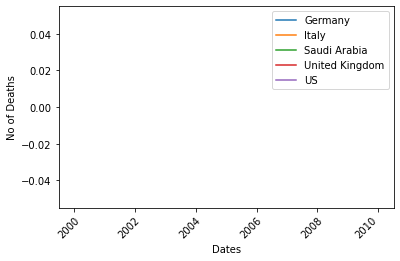

In [27]:
# The Animated Line Plot
fig = plt.figure()

#rotate the x-axis values
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
#ensuring the dates (on the x-axis) fit in the screen
plt.subplots_adjust(bottom = 0.2, top = 0.9)
plt.ylabel('No of Deaths')
plt.xlabel('Dates')

def Animate(i):
  #note it only returns the dataset, up to the point i
  p = plt.plot(df1[:i].index, df1[:i].values)
  plt.legend(df1.columns)

animator1 = animation.FuncAnimation(fig, Animate, frames=30, interval = 200)
plt.show()

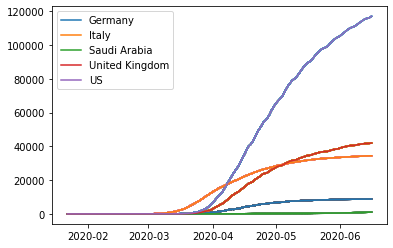

In [19]:
writer = FFMpegWriter(fps=30, metadata=dict(artist='Me'))
animator1.save("test1.mp4", writer=writer)

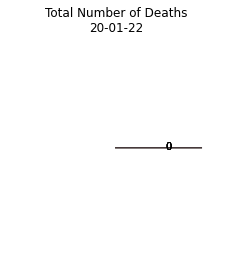

In [20]:
# The Animated Pie Chart

fig,ax = plt.subplots()
#pop out each slice from the pie
explode=[0.01,0.01,0.01,0.01, 0.01] 

def getmepie(i):
  #turn % back to a number
  def absolute_value(val): 
    a  = np.round(val/100.*df1.head(i).max().sum(), 0)
    return int(a)
  ax.clear()
  plot = df1.head(i).max().plot.pie(y=df1.columns,autopct=absolute_value, label='',explode = explode, shadow = True)
  plot.set_title('Total Number of Deaths\n' + str(df1.index[min( i, len(df1.index)-1 )].strftime('%y-%m-%d')), fontsize=12)

animator2 = animation.FuncAnimation(fig, getmepie, frames=100, interval=200)
plt.show()

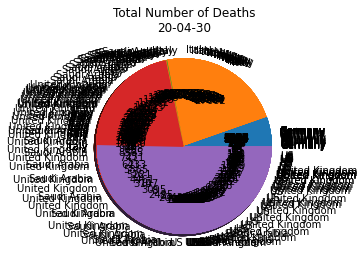

In [21]:
writer = FFMpegWriter(fps=90, metadata=dict(artist='Me'))
animator2.save("test2.mp4", writer=writer)

In [22]:
# The Animated Bar Chart
fig = plt.figure()
bar = ''


def buildmebarchart(i=int):
  #the loop iterates an extra one time, which causes the dataframes to go out of bounds. This was the easiest (most lazy) way to solve this :)
  iv = min(i, len(df1.index)-1) 
  objects = df1.max().index
  y_pos = np.arange(len(objects))
  performance = df1.iloc[[iv]].values.tolist()[0]
  if bar == 'vertical':
    plt.bar(y_pos, performance, align='center')
    plt.xticks(y_pos, objects)
    plt.ylabel('Deaths')
    plt.xlabel('Countries')
    plt.title('Deaths per Country \n' + str(df1.index[iv].strftime('%y-%m-%d')))
  else:
    plt.barh(y_pos, performance, align='center')
    plt.yticks(y_pos, objects)
    plt.xlabel('Deaths')
    plt.ylabel('Countries')


animator3 = animation.FuncAnimation(fig, buildmebarchart, frames=100, interval=200)
plt.show()

<Figure size 432x288 with 0 Axes>

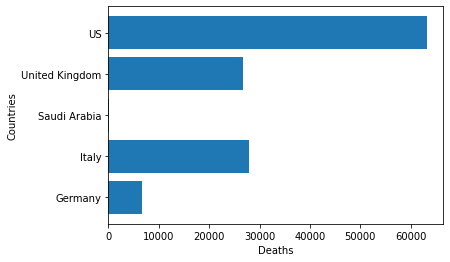

In [23]:
writer = FFMpegWriter(fps=30, metadata=dict(artist='Me'))
animator3.save("test3.mp4", writer=writer)

In [24]:
animator1

In [25]:
animator2

In [26]:
animator3